In [21]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

# read new energys

In [164]:
dataset = {"old":"1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "),
            "new":"1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "),
            "test":["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"]}
dataset["combined"] = dataset["old"] + dataset["new"]
dataset["combined"] = [a.lower()[:4] for a in dataset["combined"] ]
folder_list = ["original", "multi_iter0"]



In [96]:
dd = []
for simulation_location in folder_list:
    for p in dataset["combined"]:
        for i in range(30):
            d = pd.read_csv(f"/Users/weilu/Research/server/may_2019/database/{simulation_location}_{p}_{i}/ff_energy_smaller.dat", sep="\s+", names=["Name", "direct", "mediated", "burial", "water", "Newcontact"])
            d["Frame"] = d["Name"].apply(lambda x:int(x[5:])-1)
            d = d[["Newcontact", "Frame"]]
            d = d.assign(Name=p, Repeat=i, Folder=simulation_location)
            dd.append(d)
d_span = pd.concat(dd)


In [200]:
folder_list = ["original"]
dd = []
for simulation_location in folder_list:
    for p in dataset["combined"]:
        for i in range(30):
            try:
                d = pd.read_csv(f"/Users/weilu/Research/server/may_2019/database/{simulation_location}_{p}_{i}/ff_energy.dat", sep="\s+", names=["Name", "direct", "mediated", "burial", "water", "Newcontact"])
            except:
                print(f"{simulation_location}_{p}_{i}")
                continue
            d["Frame"] = d["Name"].apply(lambda x:int(x[5:])-1)
            d = d[["Newcontact", "Frame"]]
            d = d.assign(Name=p, Repeat=i, Folder=simulation_location)
            dd.append(d)
d_last = pd.concat(dd)


original_1fc2_3
original_1fc2_5
original_1fc2_6
original_1fc2_8
original_1fc2_18
original_1fc2_21
original_1fc2_27
original_1enh_3
original_1enh_6
original_1enh_11
original_1enh_15
original_1enh_21
original_1enh_24
original_1enh_25
original_2gb1_0
original_2gb1_2
original_2gb1_9
original_2gb1_16
original_2gb1_20
original_2gb1_25
original_2gb1_26
original_2cro_3
original_2cro_7
original_2cro_9
original_2cro_12
original_2cro_13
original_2cro_18
original_2cro_19
original_2cro_26
original_2cro_29
original_1ctf_7
original_1ctf_15
original_1ctf_18
original_1ctf_20
original_1ctf_21
original_1ctf_22
original_4icb_3
original_4icb_5
original_4icb_15
original_4icb_18
original_4icb_27


In [165]:
data = get_complete_data(pre, folder_list, pdb_list, run=-1, rerun=-1, formatName=True)
data.Steps = data.Steps.astype(int)
data["Contact"] = data["Water"] + data["Burial"]
native = data



1r69 26
1utg 26
3icb 26
256b 26
4cpv 26
1ccr 26
2mhr 26
1mba 26
2fha 26
1fc2 26
1enh 26
2gb1 26
2cro 26
1ctf 26
4icb 26
1r69 26
1utg 26
3icb 26
256b 26
4cpv 26
1ccr 26
2mhr 26
1mba 26
2fha 26
1fc2 26
1enh 26
2gb1 26
2cro 26
1ctf 26
4icb 26


In [168]:
native_energy = native.groupby(["Name", "Folder"]).head(1).reset_index()
native_energy["Contact"] = native_energy["Water"] + native_energy["Burial"]

In [184]:
dd = []
for simulation_location in folder_list:
    for p in dataset["combined"]:
        location = f"/Users/weilu/Research/server/may_2019/single_memory/{simulation_location}/{p}/simulation/native/rerun/newContact.dat"
        d = pd.read_csv(location, sep="\s+", names=["Name", "direct", "mediated", "burial", "water", "Newcontact"])
        d = d.assign(Name=p, Folder=simulation_location)
        dd.append(d)
d_native = pd.concat(dd)


In [79]:
# dd = []
# for i in range(2):
#     d = pd.read_csv(f"/Users/weilu/Research/server/may_2019/database/original_1r69_0/ff_energy_smaller.dat", sep="\s+", names=["Name", "direct", "mediated", "burial", "water", "Newcontact"])
#     d["Frame"] = d["Name"].apply(lambda x:int(x[5:])-1)
#     d = d[["Newcontact", "Frame"]]
#     dd.append(d.assign(Name="1r69", Repeat=i, Folder="original"))
# d = pd.concat(dd)

In [204]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/may12.csv")

In [ ]:
data["Frame"] = data["Steps"] // 4000

In [215]:
# data = data.reset_index().rename(columns={"index":"Frame"})
# data = pd.read_csv("/Users/weilu/Research/data/optimization/may12.csv")
data = data.merge(d_last, on=["Name", "Repeat", "Frame", "Folder"])
lastFrames = data

In [218]:
lastFrames.shape

(20450, 22)

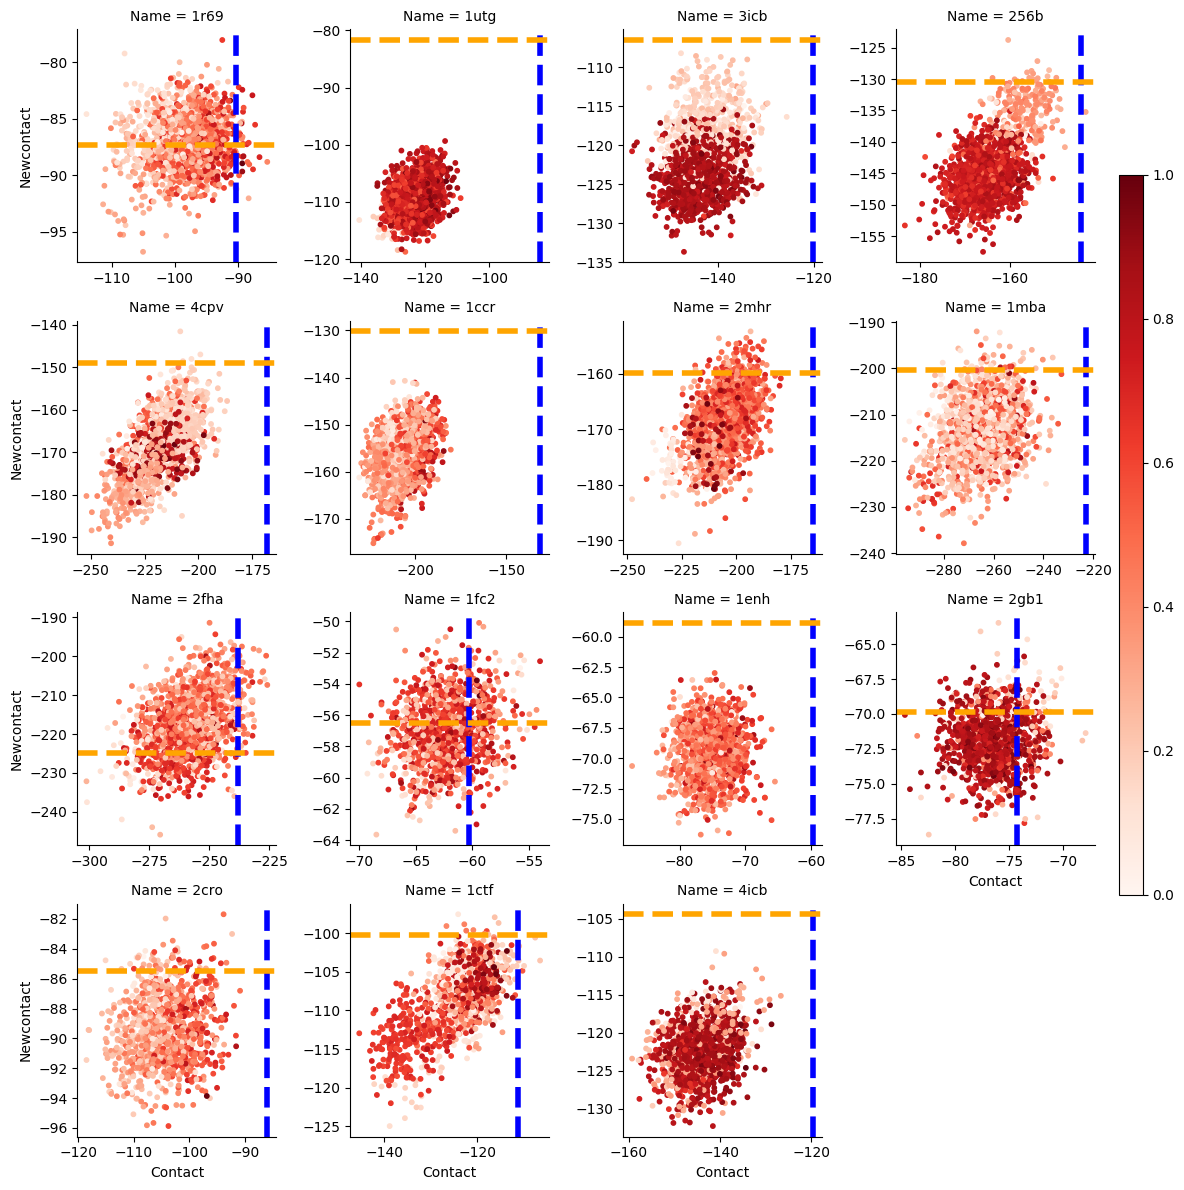

In [219]:
y_show = "Contact"
g = sns.FacetGrid(lastFrames, col='Name',col_wrap=4, sharey=False, sharex=False)

def facet_scatter(x, y, c, **kwargs):
    """Draw scatterplot with point colors from a faceted DataFrame columns."""
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)

vmin, vmax = 0, 1
# cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)
# cmap = plt.cm.viridis
# cmap = plt.cm.Accent
cmap = plt.cm.Reds

# g = g.map(facet_scatter, 'Contact', 'Newcontact', "Qw", s=10, alpha=1, vmin=vmin, vmax=vmax, cmap=cmap)
g = g.map(facet_scatter, 'Contact', 'Newcontact', "Qw", s=10, alpha=1, cmap=cmap)

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)

for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
#     ax.set_aspect('equal')
    # print(name)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[0]
    ax.axvline(energy, ls="--", color="blue", linewidth=4)
    energy = d_native.query(f"Name == '{name}'")["Newcontact"].iloc[0]
    ax.axhline(energy, ls="--", color="orange", linewidth=4)
#     energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[1]
#     ax.axvline(energy, ls="--", color="orange", linewidth=4)

In [107]:
cmap = sns.cubehelix_palette(as_cmap=True)
# , c=data["Qw"]

In [120]:
data_folder_original = data.query("Folder == 'original'")

In [ ]:
plt.cm.Accent

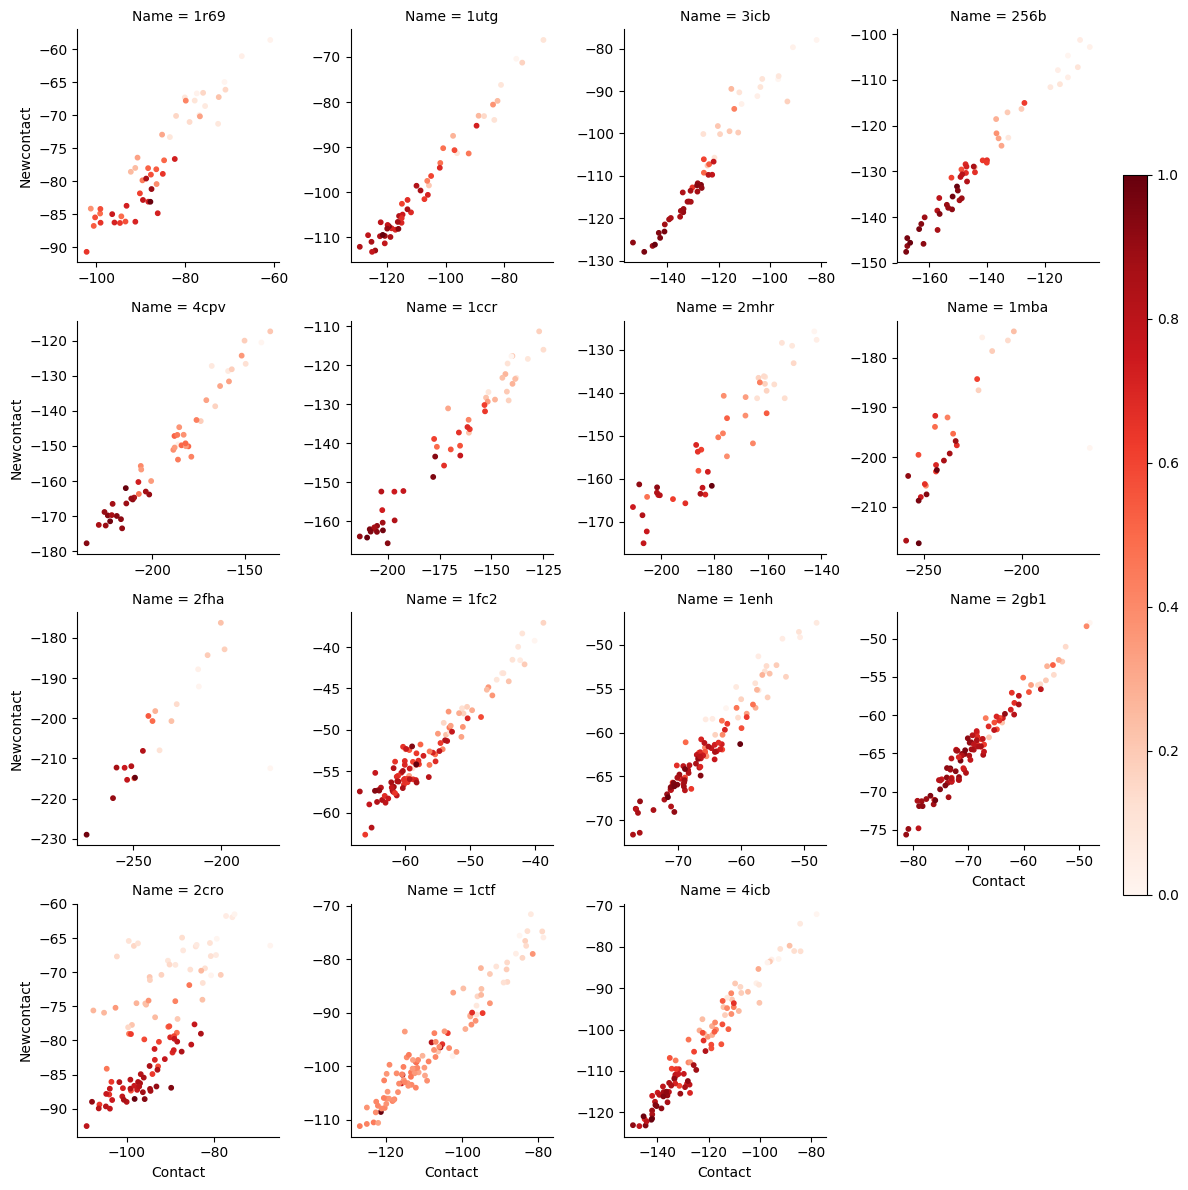

In [134]:
g = sns.FacetGrid(data_folder_original, col='Name',col_wrap=4, sharey=False, sharex=False)

def facet_scatter(x, y, c, **kwargs):
    """Draw scatterplot with point colors from a faceted DataFrame columns."""
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)

vmin, vmax = 0, 1
# cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)
# cmap = plt.cm.viridis
# cmap = plt.cm.Accent
cmap = plt.cm.Reds

# g = g.map(facet_scatter, 'Contact', 'Newcontact', "Qw", s=10, alpha=1, vmin=vmin, vmax=vmax, cmap=cmap)
g = g.map(facet_scatter, 'Contact', 'Newcontact', "Qw", s=10, alpha=1, cmap=cmap)

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)

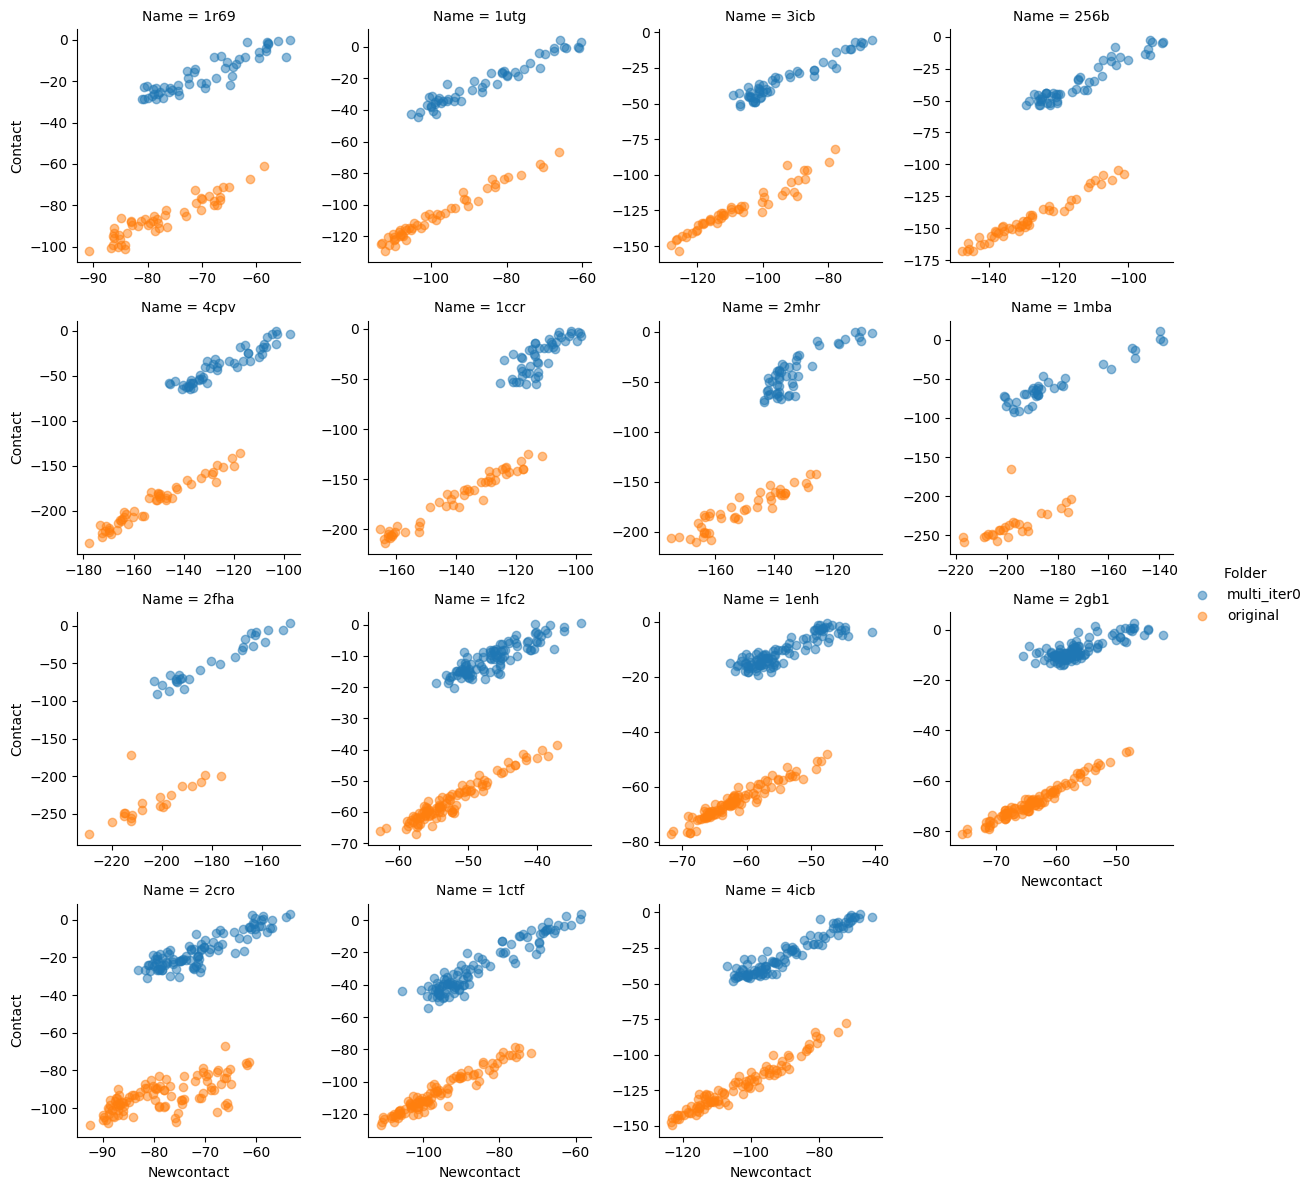

In [109]:
y_show = "Contact"
g = sns.FacetGrid(data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Newcontact", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
#     energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[0]
#     ax.axhline(energy, ls="--", color="blue", linewidth=4)
#     energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[1]
#     ax.axhline(energy, ls="--", color="orange", linewidth=4)

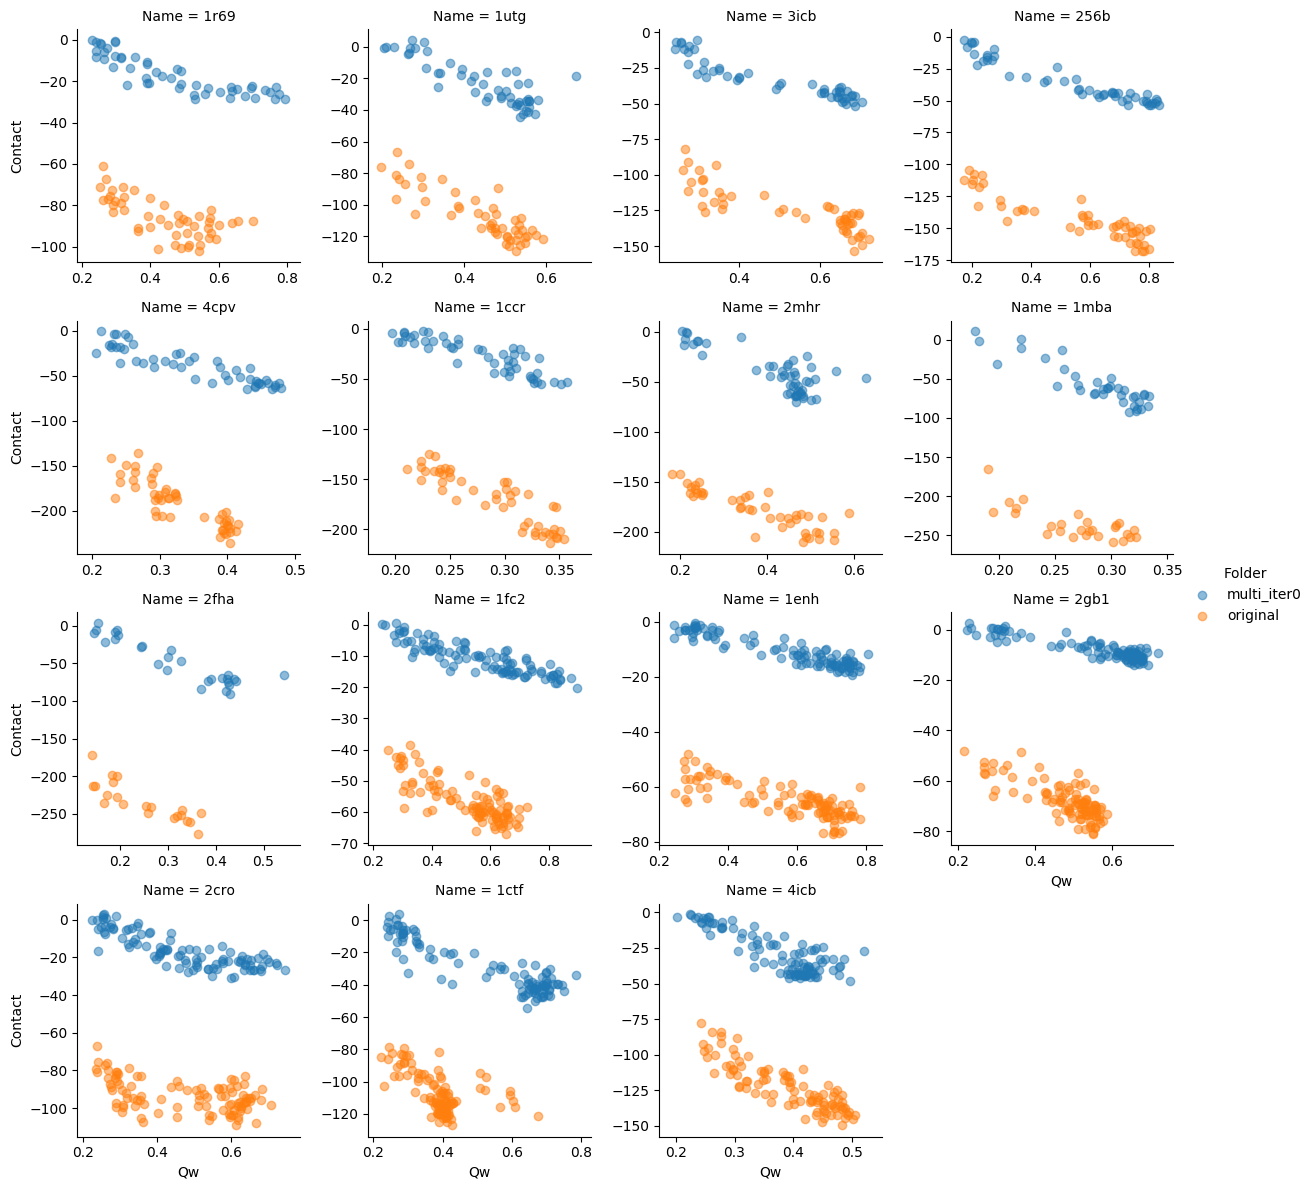

In [104]:
y_show = "Contact"
g = sns.FacetGrid(data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
#     energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[0]
#     ax.axhline(energy, ls="--", color="blue", linewidth=4)
#     energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[1]
#     ax.axhline(energy, ls="--", color="orange", linewidth=4)

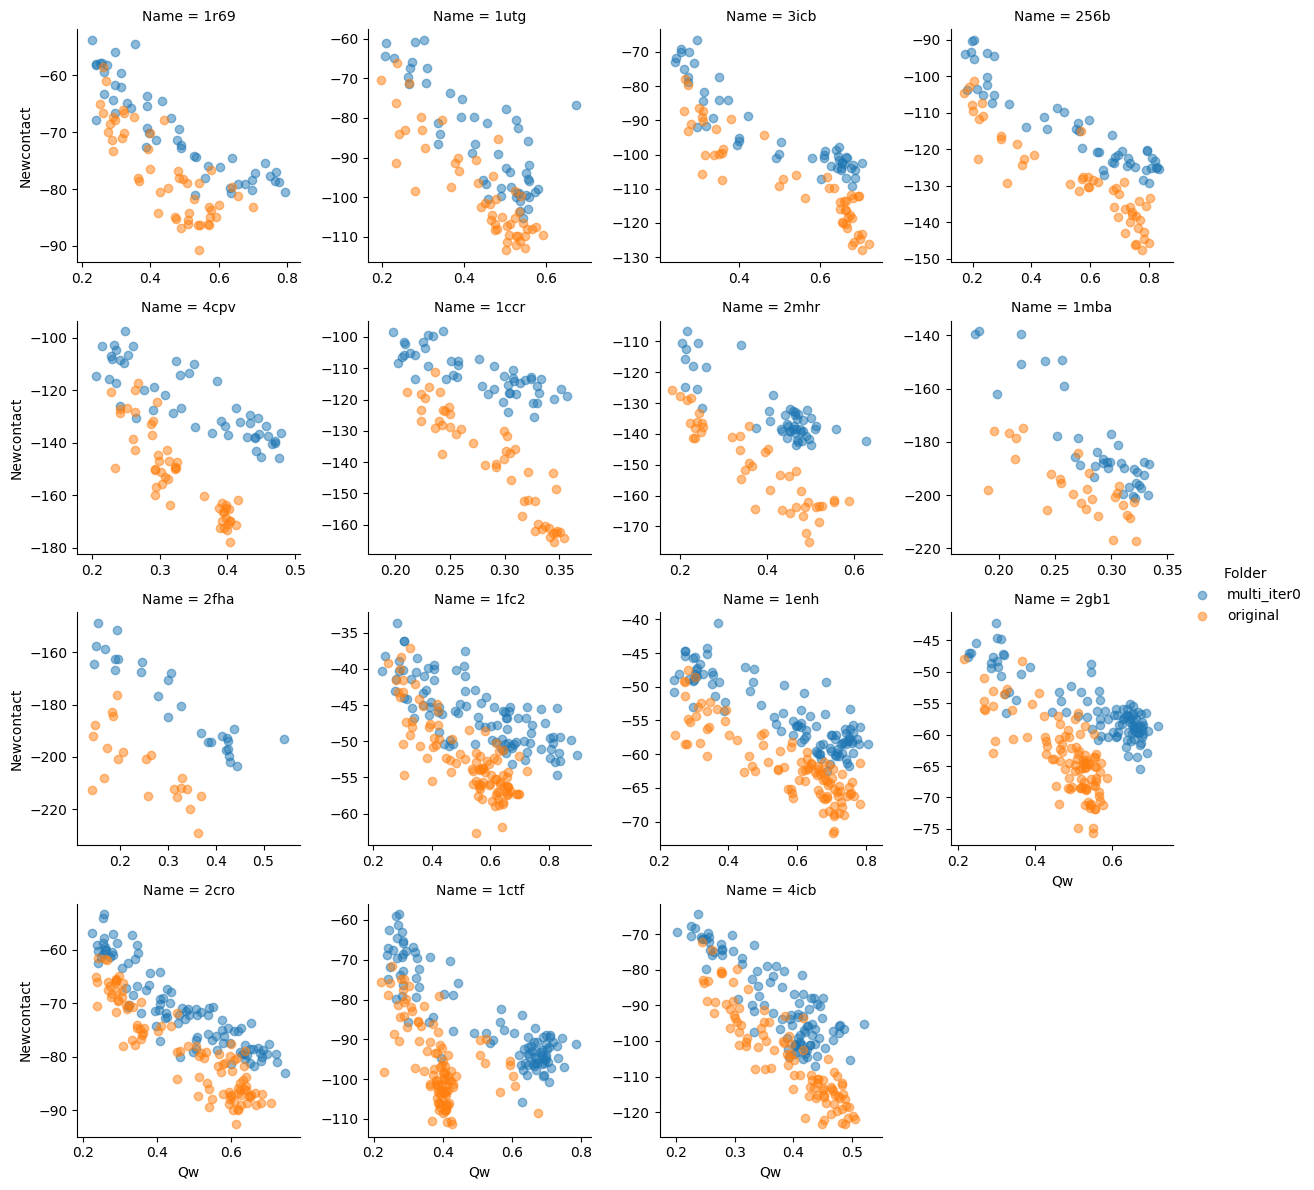

In [115]:
y_show = "Newcontact"
g = sns.FacetGrid(data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
#     energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[0]
#     ax.axhline(energy, ls="--", color="blue", linewidth=4)
#     energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[1]
#     ax.axhline(energy, ls="--", color="orange", linewidth=4)

In [56]:
dataset["combined"][::4]

['1r69', '4cpv', '2fha', '2cro']

In [131]:
pre = "/Users/weilu/Research/server/may_2019/single_memory/"
folder_list = ["multi_iter0", "original"]
# folder_list = ["original", "multi_iter0", "multi_iter0_A_norm"]
# pdb_list = ['T0759-D1', 'T0953s2-D1', 'T0943-D1', 'T0773-D1', 'T0816-D1', 'T0854-D2', 'T0767-D1', 'T0853-D1', 'T0958-D1', 'T0834-D2', 'T0960-D3', 'T0862-D1', 'T0912-D3', 'T0898-D1', 'T0824-D1', 'T0782-D1', 'T0830-D2', 'T0761-D2', 'T0968s1-D1', 'T0870-D1', 'T0838-D1', 'T0803-D1']
pdb_list = dataset["combined"]
# data = get_complete_data(pre, folder_list, pdb_list, run=30, rerun=-1, formatName=True)
data = get_complete_data(pre, folder_list, pdb_list, run=30, rerun=1, formatName=True)
data.Steps = data.Steps.astype(int)
data["Contact"] = data["Water"] + data["Burial"]
subset_data = data.query("Steps % 80000 == 0 and Steps != 0")


1r69 30000
1utg 30000
3icb 30000
256b 30000
4cpv 29447
1ccr 29882
2mhr 30000
1mba 21514
2fha 17974
1fc2 60000
1enh 60000
2gb1 60000
2cro 60000
1ctf 60000
4icb 60000
1r69 30000
1utg 30000
3icb 30000
256b 30000
4cpv 27368
1ccr 29349
2mhr 25954
1mba 15733
2fha 12663
1fc2 60000
1enh 60000
2gb1 60000
2cro 60000
1ctf 60000
4icb 57185


In [145]:
data = data.reset_index().rename(columns={"index":"Frame"})

In [217]:
data.to_csv("/Users/weilu/Research/data/optimization/may12.csv", index=False)

In [153]:
data.head()

,Frame,Name,Folder,Steps,Qw,VTotal,Run,Repeat,Rg,Chain,...,Rama,DSSP,P_AP,Water,Burial,Frag_Mem,Membrane,Ebond,Epair,Contact
0,0,1r69,multi_iter0,4000,0.193587,32.846189,0,0,13.729240,117.335960,...,-68.363490,-7.448148e-09,-0.302663,-0.352092,0.547699,-46.806368,0,231.242572,3.676008,0.195607
1,1,1r69,multi_iter0,8000,0.285489,-18.435709,0,0,11.611291,97.405819,...,-85.272285,-6.193622e-09,-0.000024,-0.760833,-3.306631,-51.816502,0,171.768760,4.593524,-4.067463
2,2,1r69,multi_iter0,12000,0.269852,-49.723754,0,0,12.434633,98.900921,...,-108.299491,-3.945525e-11,-4.895514,-3.022268,-4.266513,-53.962640,0,178.143146,9.060159,-7.288781
3,3,1r69,multi_iter0,16000,0.240949,-41.060642,0,0,13.608511,100.175442,...,-106.898143,0.000000e+00,-3.541985,-0.772281,-1.714297,-58.402632,0,136.707373,2.450007,-2.486578
4,4,1r69,multi_iter0,20000,0.274798,-53.898002,0,0,12.339789,91.920236,...,-106.773227,-2.129167e-05,-1.199922,-0.257552,-1.707604,-56.133541,0,181.615721,8.215264,-1.965156


In [154]:
data.tail()

,Frame,Name,Folder,Steps,Qw,VTotal,Run,Repeat,Rg,Chain,...,Rama,DSSP,P_AP,Water,Burial,Frag_Mem,Membrane,Ebond,Epair,Contact
1197064,57180,4icb,original,7632000,0.693772,-545.361860,0,29,10.864892,45.130422,...,-281.489395,-7.586265,-19.986218,-78.129953,-66.942107,-147.757065,0,62.537212,8.252345,-145.072059
1197065,57181,4icb,original,7636000,0.644205,-552.857857,0,29,10.950401,43.571405,...,-291.297021,-6.511710,-18.937019,-80.540026,-64.863851,-147.324974,0,61.407327,8.847361,-145.403877
1197066,57182,4icb,original,7640000,0.669323,-559.443299,0,29,10.871958,43.011016,...,-286.244062,-7.157793,-21.132623,-83.076710,-65.226756,-150.731587,0,66.308690,9.802991,-148.303465
1197067,57183,4icb,original,7644000,0.678404,-557.144196,0,29,10.948422,41.384753,...,-288.091959,-7.668463,-15.704897,-78.262978,-67.375753,-151.781243,0,75.307069,6.638169,-145.638731
1197068,57184,4icb,original,7648000,0.709581,-566.219098,0,29,10.830617,39.956116,...,-287.520237,-7.329456,-16.459038,-79.856802,-68.905177,-157.386246,0,66.988442,11.576489,-148.761979


In [155]:
a = pd.read_csv("/Users/weilu/Research/data/optimization/may12.csv")

In [222]:
import xml.etree.ElementTree as ET
import pandas as pd

# do this if running in jupyter
# pd.set_option('display.max_columns', None)

# convert XML to dataframe (assumes only one layer of nesting)
def xml2df(xml_data):
    root = ET.XML(xml_data) # element tree
    all_records = []
    for i, child in enumerate(root):
        record = {}
        for subchild in child:
            record[subchild.tag] = subchild.text
        all_records.append(record)
    df = pd.DataFrame(all_records)

    # how to make datetimes from unix epoch ints
#     df['CreatedTimestamp'] = pd.to_datetime(df['CreatedDate'], unit='s')
#     df['ModifiedTimestamp'] = pd.to_datetime(df['ModifiedDate'], unit='s')

    return df

# load XML to dataframe (gotta be small)
xml_data = open('/Users/weilu/Downloads/2018/1800011.xml').read()
df = xml2df(xml_data)


In [223]:
df

,ARRAAmount,AbstractNarration,AwardAmount,AwardEffectiveDate,AwardExpirationDate,AwardID,AwardInstrument,AwardTitle,Institution,Investigator,MaxAmdLetterDate,MinAmdLetterDate,Organization,ProgramElement,ProgramOfficer,ProgramReference
0,None,This award from the Chemical Synthesis Program...,479676,07/01/2018,06/30/2021,1800011,\n,Metal Catalyzed Methods for the Preparation of...,\n,\n,05/31/2018,05/31/2018,\n,\n,\n,\n


In [225]:
a = glob.glob("/Users/weilu/Downloads/2018/*.xml")

In [228]:
all_data = []
for line in a:
    # load XML to dataframe (gotta be small)
    try:
        xml_data = open(line).read()
        df = xml2df(xml_data)
        all_data.append(df)
    except:
        print(line)

/Users/weilu/Downloads/2018/1817537.xml
/Users/weilu/Downloads/2018/1830728.xml


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a31e989b0>]],
      dtype=object)

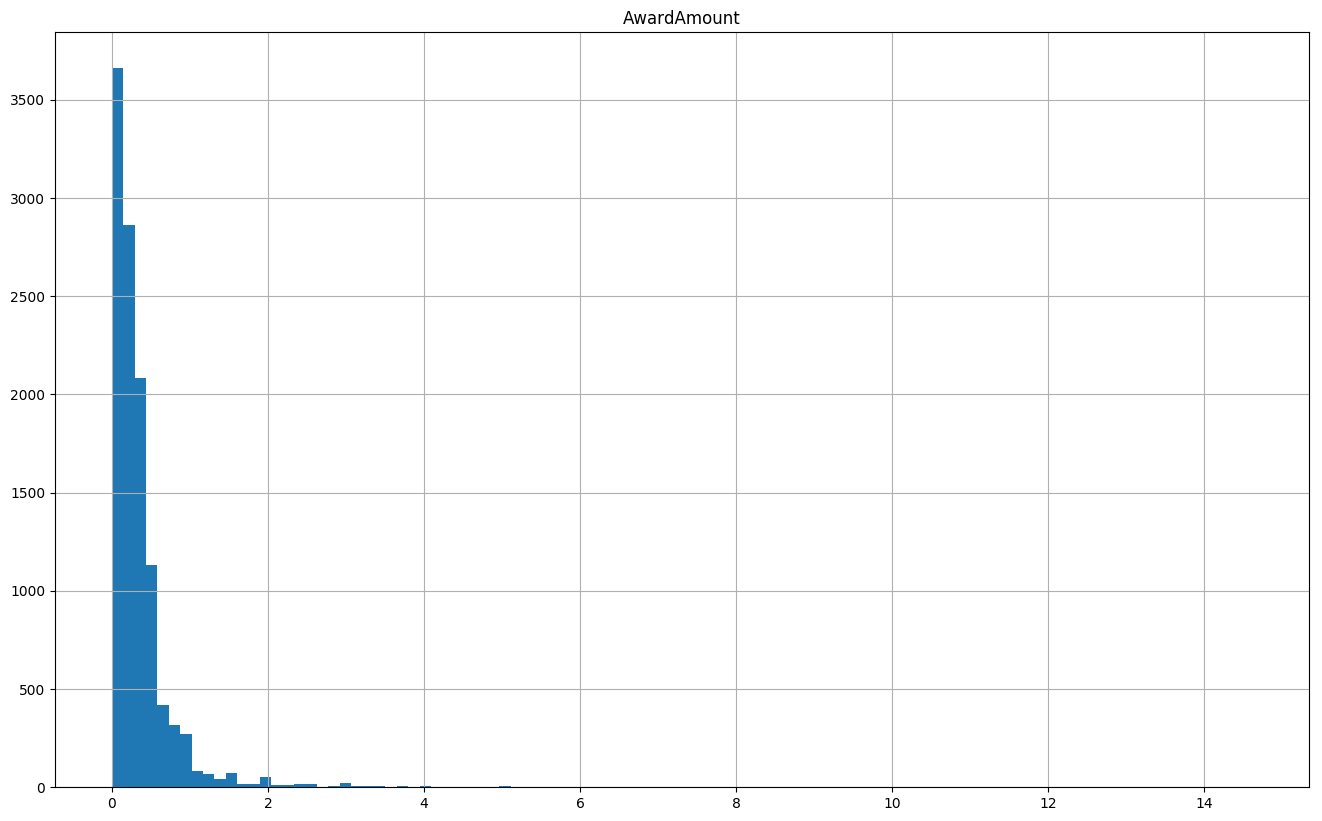

In [260]:
a.query("AwardAmount < 15").hist("AwardAmount", bins=100)

In [265]:
a.query("AwardAmount > 10").shape

(13, 17)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a375cefd0>]],
      dtype=object)

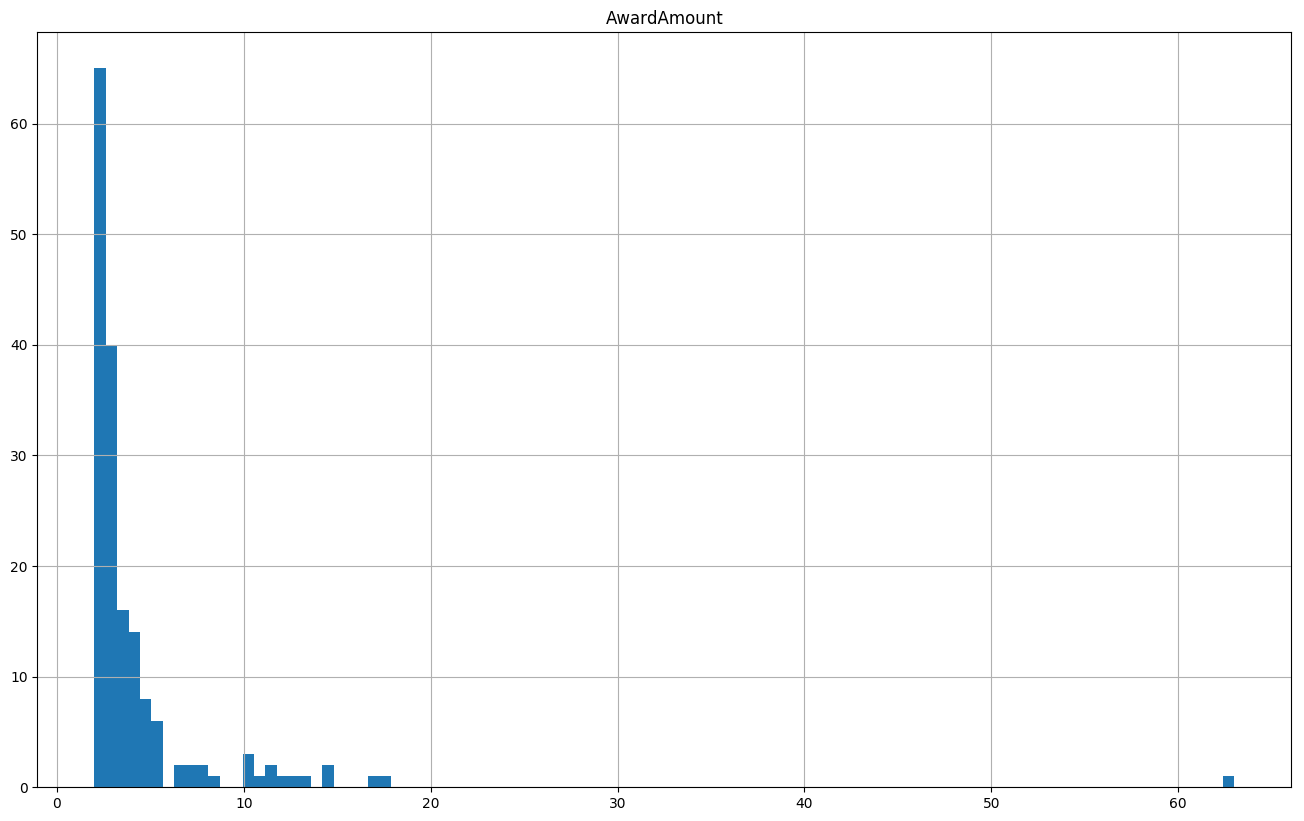

In [262]:
a.query("AwardAmount > 2").hist("AwardAmount", bins=100)